# Introducing NextworkX and Network Analysis

This exercise is a shortened version of a workshop "Social Network Analysis with Python and NetworkX" by Jordi Torrents delivered at PyData 2017 https://pydata.org/barcelona2017/schedule/presentation/7/ . 


The original exercise and solution can be found on GitHub at: https://github.com/jtorrents/pydata_bcn_NetworkX.

*Many thanks to Jordi Torrents*

## Social Network Analysis with Python and NetworkX

Social Network Analysis (SNA) has a wide applicability in many scientific fields and industries. This workshop is a gentle introduction to SNA using Python and NetworkX, a powerful and mature python library for the study of the structure, dynamics, and functions of complex networks. Participants in this workshop should have a basic understanding of Python, no previous knowledge of SNA is assumed.

For this workshop attendees will need to install NetworkX (>=1.11), Matplotlib (>=1.5), numpy (>=1.10) and have a working Jupyter Notebook environment. Some examples will also use Pandas (>=0.17) and Seaborn (>=0.7), but these packages are not essential. Only basic Python knowledge is assumed.

## Outline of the workshop

*Please note sections that have been crossed out are skipped in this brief introduction exercise. You can find them in the original workshop at https://github.com/jtorrents/pydata_bcn_NetworkX*

1. ~~Brief Introduction to Graph Theory~~
    * ~~Mathematical foundation of Social Network Analysis.~~
    * ~~Why graphical representations usually doesn't help much~~  
2. Creating and Manipulating Graphs
    * Data Structures: Graphs, DiGraphs, MultiGraphs and MultiDiGraphs.
    * Adding nodes and edges.
    * Adding and updating node and edge attributes.
    * Graph generators.
    * Visualizing graphs using Matplotlib.
    * Common formats for reading and writing Graphs. 
3. Network Analysis
    * Basic concepts: Degree.
    * ~~Distance measures: paths, simple paths, and shortest paths.~~
    * ~~Node centrality analysis: measures and their relation.~~
    * ~~Analyzing groups and subgroups: Cliques, k-cores, components, and k-components.~~
4. ~~Bipartite Graphs~~
    * ~~Definition of bipartite networks and their use in modeling group affiliations.~~
    * ~~Working with bipartite networks with NetworkX~~.

## ~~Brief Introduction to Graph Theory~~

*Skipped in this brief introduction exercise. Please see the original workshop at https://github.com/jtorrents/pydata_bcn_NetworkX*

## Creating and Manipulating Graphs using NetworkX

NetworkX is a python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

~~The current version of NetworkX is 1.11 but the new 2.0 version will be released soon. The code provided in this workshop will work on both but if you know how to install the development version of NetworkX you will get better performance and more features.~~

*Updated to work with 2.4 version*

In [2]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.4


### Data Structures: Graphs, DiGraphs, MultiGraphs and MultiDiGraphs


* **Graph**: Undirected graph, allows self-loops

* **DiGraph**: Directed graph, allows self-loops

* **MultiGraph**: Undirected graph with parallel edges, allows self-loops

* **MultiDiGraph**: Directed graph with parallel edges, allows self-loops

In [3]:
G = nx.Graph()
D = nx.DiGraph()
MG = nx.MultiGraph()
MDG = nx.MultiDiGraph()

*Short exercise note: In the PEP8 Python convention it is normal to name variables using `snake_case` with variable names stating the contents of a variable rather than its type. In NetworkX documentation including this workshop a different convention is followed.*

#### Internal Graph representation
Common graph representations, for instance of a complete undirected graph of 3 nodes (ie a triangle):

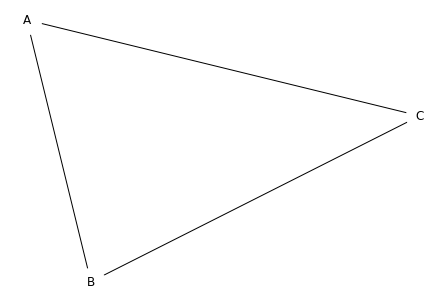

In [4]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C')])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

A useful method for quickly looking at our graph is **nx.info**

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000



**Adjacency Matrix** A $n x n$ matrix:

        0  1  1        G = [[0, 1, 1],
        1  0  1             [1, 0, 1],
        1  1  0             [1, 1, 0]]

**Adjacency List** A list of neighbors:

        A: B, C        G = {'A': ['B', 'C'],
        B: A, C             'B': ['A', 'C'],
        C: A, B             'C': ['A', 'B']} 

**Edge List** A list of edges:

        A B            G = [['A', 'B'],
        A C                 ['A', 'C'],
        B C                 ['B', 'C']]

NetworkX uses a __dictionary of dictionaries__ based **Adjacency List** format which is fast and ligthweight for sparse graphs. This approach is inspired on Guido van Rossum's essay [Python Patterns - Implementing Graphs](https://www.python.org/doc/essays/graphs/) and in the work of David Eppstein on [Python Algorithms and Data Structures](https://www.ics.uci.edu/~eppstein/PADS/).

This approach allows for natural expressions such as:

* **n in G** to test if the graph $G$ contains node $n$
* **for n in G** to loop over all nodes
* **G[n]** to access all neighbors of $n$ in $G$
* **len(G)** to get the number of nodes in $G$

Internally the node $n$ is a key in the $G.adj$ dictionary, values are themselves dictionaries with neighbors as keys and another dictionary as value that holds edge attributes.

So NetworkX graphs are "dictionaries all the way down". This is not exactly true in version 2.0 but it is safe for users to think of it this way. 

In [7]:
print(G.adj)

{'A': {'B': {}, 'C': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'A': {}, 'B': {}}}


In [8]:
'A' in G

True

In [9]:
for n in G:
    print(n)

A
B
C


In [10]:
G['A']

AtlasView({'B': {}, 'C': {}})

In [11]:
len(G)

3

### Creating Graphs and adding and removing Nodes and Edges

NetworkX is a node centric package; nodes can be any hashable object.

A graph $G$ can be grown in several ways:

* Adding nodes with:
    - **G.add_node** : One node at a time
    - **G.add_nodes_from** : A conteiner of nodes
* Adding edges with:
    - **G.add_edge**: One edge at a time
    - **G.add_edges_from** : A container of edges


In [12]:
# Create an undirected Graph
G = nx.Graph()
# One node at a time
G.add_node(1)  # "method" of G
# A list of nodes
G.add_nodes_from([2, 3])
# A container of nodes
H = nx.path_graph(10)
G.add_nodes_from(H) # G now contains the nodes of H
# In contrast, you could use the graph H as a node in G. 
G.add_node(H) # G now contains Graph H as a node 

G can also be grown by adding edges.

If the edge added already exists no error is raised.

If the nodes referred by edges do not already exist they are automatically added to the graph.

In [13]:
# Adding a single edge
G.add_edge(1, 2)
# If you have a tuple representing an edge you have to unpack it
e = (2, 3)
G.add_edge(*e) # unpack edge tuple with *
# Add a list of edges 
G.add_edges_from([(1, 2), (1, 3)])
# Add from a container of edges
G.add_edges_from(H.edges())

Similarly you can remove nodes and edges

* Removing nodes with:
    - **G.remove_node** : One node at a time
    - **G.remove_nodes_from** : A conteiner of nodes
* Adding edges with:
    - **G.remove_edge**: One edge at a time
    - **G.remove_edges_from** : A container of edges


### Adding and removing Graph, Node, and Edge Attributes

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary.

In [14]:
# Assign graph attributes when creating a new graph
G = nx.Graph(day='Friday', name='My Graph')
G.graph # Access to the dictionary that stores graph attrs

{'day': 'Friday', 'name': 'My Graph'}

In [15]:
# Or you can modify attributes later
G.graph['day']='Monday'
G.graph

{'day': 'Monday', 'name': 'My Graph'}

#### Node Attributes

In order to add node attributes you can use the methods **G.add_node** and **G.add_nodes_from**, or the node attribute dictionary **G.nodes**

In [16]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm') # multiple nodes
G.nodes[1]['room'] = 714 # add new attribute

Adding a node that is already in the graph does not raise an error, you can add new attributes to an existing node by adding it again with a new attribute:  

In [17]:
G.add_node(3, room=715)

In order to access node attribute information you can:

In [18]:
# Access the value of the attribute
G.nodes[1]['time']

'5pm'

In [19]:
# Access the attribute dictionary
G.nodes[1]

{'time': '5pm', 'room': 714}

In practice, it's usually more useful to iterate over nodes with their attributes 

In [20]:
# Nodes without attributes
list(G.nodes())

[1, 3]

In [21]:
# Tuples of node and attribute dictionary
list(G.nodes(data=True))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm', 'room': 715})]

In [22]:
# In NetworkX version 2.0 you can also directly specify the node attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.nodes(data='room')))

[(1, 714), (3, 715)]


~~You can also set node attributes using the function **nx.set_node_attributes**. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by node with the value of the attribute for each node or a single value that will be used for all nodes:~~

*this currently fails with AttributeError exception*

In [23]:
## comment out this cell as it fails
#nx.set_node_attributes(G, 'grade', {1: 'A', 3:'C'})

In [24]:
nx.set_node_attributes(G, 'year', 2017)

You can get a dictionary keyed by node with the value of a node attribute with the function **nx.get_node_attributes**:

In [25]:
nx.get_node_attributes(G, 'time')

{1: '5pm', 3: '2pm'}

#### Edge Attributes

In order to add edge attributes you can use the methods **G.add_edge** and **G.add_edges_from**; ~~the edge attribute dictionary **G.edge**~~ or subscript notation.

In [26]:
G.add_edge(1, 2, weight=4.0 )
G.add_edges_from([(3, 4),(4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])
# When an edge is already added you can use subscript notation or update the edge attribute dictionary
G[1][2]['weight'] = 4.0
# next line fails
# G.edge[1][2]['weight'] = 4.0

Adding an edge that is already in the graph does not raise an error, you can add new attributes to an existing edge by adding it again with a new attribute:  

In [27]:
G.add_edge(3, 4, weight=12)

In order to access edge attribute information you can:

In [28]:
# Access the value of attribute weight
G[1][2]['weight'] # or equivalently G.edge[1][2]['weight']

4.0

In [29]:
# Attributes dictionary for edge 1 -- 2
G[1][2] # or equivalently G.edge[1][2]

{'weight': 4.0, 'color': 'blue'}

In practice it's usually more useful to iterate over edges with their attributes 

In [30]:
# Edges without attributes
list(G.edges())

[(1, 2), (3, 4), (3, 2), (4, 5)]

In [31]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

[(1, 2, {'weight': 4.0, 'color': 'blue'}),
 (3, 4, {'color': 'red', 'weight': 12}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

In [32]:
# In NetworkX version 2.0 you can also directly specify the edge attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.edges(data='weight')))

[(1, 2, 4.0), (3, 4, 12), (3, 2, 8), (4, 5, None)]


You can also set edge attributes using the function **nx.set_edge_attributes**. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by edge with the value of the attribute for each edge or a single value that will be used for all edges:

In [33]:
nx.set_edge_attributes(G, 'capacity', 1)

In [34]:
nx.set_edge_attributes(G, {(1, 2): True, (2, 3): False, (3, 4): False, (4, 5): True}, 'friendship')

You can get a dictionary keyed by edge with the value of an edge attribute with the function **nx.get_edge_attributes**:

In [35]:
nx.get_edge_attributes(G, 'friendship')

{(1, 2): True, (3, 4): False, (3, 2): False, (4, 5): True}

A useful method for quickly looking at our graph is **nx.info**

In [36]:
print(nx.info(G))

Name: My Graph
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


### Exercise: Building a Graph

Build an undirected graph with 50 nodes named as integers from 1 to 50.

In [37]:
# ANSWER
integer_graph = nx.Graph()
integer_graph.add_nodes_from(range(1,51))
print(integer_graph.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


Add edges between nodes with consecutive numbers, that is, node 1 should have and edge to node 2, node 2 to node 3, etc ...

In [43]:
# ANSWER
previous_node = None
for node in integer_graph.nodes():
    if previous_node is not None:
        integer_graph.add_edge(previous_node, node)
    previous_node = node
print(nx.info(integer_graph))

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 49
Average degree:   1.9600


Add a node attribute named **kind** with the value **odd** if the node is odd or **even** if the node is even:

In [44]:
# ANSWER
for node in integer_graph:
    kind = 'odd' if node%2 == 1 else 'even'
    integer_graph.nodes[node]['kind'] = kind
list(integer_graph.nodes(data=True))

[(1, {'kind': 'odd'}),
 (2, {'kind': 'even'}),
 (3, {'kind': 'odd'}),
 (4, {'kind': 'even'}),
 (5, {'kind': 'odd'}),
 (6, {'kind': 'even'}),
 (7, {'kind': 'odd'}),
 (8, {'kind': 'even'}),
 (9, {'kind': 'odd'}),
 (10, {'kind': 'even'}),
 (11, {'kind': 'odd'}),
 (12, {'kind': 'even'}),
 (13, {'kind': 'odd'}),
 (14, {'kind': 'even'}),
 (15, {'kind': 'odd'}),
 (16, {'kind': 'even'}),
 (17, {'kind': 'odd'}),
 (18, {'kind': 'even'}),
 (19, {'kind': 'odd'}),
 (20, {'kind': 'even'}),
 (21, {'kind': 'odd'}),
 (22, {'kind': 'even'}),
 (23, {'kind': 'odd'}),
 (24, {'kind': 'even'}),
 (25, {'kind': 'odd'}),
 (26, {'kind': 'even'}),
 (27, {'kind': 'odd'}),
 (28, {'kind': 'even'}),
 (29, {'kind': 'odd'}),
 (30, {'kind': 'even'}),
 (31, {'kind': 'odd'}),
 (32, {'kind': 'even'}),
 (33, {'kind': 'odd'}),
 (34, {'kind': 'even'}),
 (35, {'kind': 'odd'}),
 (36, {'kind': 'even'}),
 (37, {'kind': 'odd'}),
 (38, {'kind': 'even'}),
 (39, {'kind': 'odd'}),
 (40, {'kind': 'even'}),
 (41, {'kind': 'odd'}),
 (42,

Add an edge attribute named **product** with the value of the product of the two nodes that it links.

In [45]:
# ANSWER
for edge in integer_graph.edges:
    node_a, node_b = edge
    integer_graph[node_a][node_b]['product'] = node_a*node_b
integer_graph.edges(data=True)

EdgeDataView([(1, 2, {'product': 2}), (2, 3, {'product': 6}), (3, 4, {'product': 12}), (4, 5, {'product': 20}), (5, 6, {'product': 30}), (6, 7, {'product': 42}), (7, 8, {'product': 56}), (8, 9, {'product': 72}), (9, 10, {'product': 90}), (10, 11, {'product': 110}), (11, 12, {'product': 132}), (12, 13, {'product': 156}), (13, 14, {'product': 182}), (14, 15, {'product': 210}), (15, 16, {'product': 240}), (16, 17, {'product': 272}), (17, 18, {'product': 306}), (18, 19, {'product': 342}), (19, 20, {'product': 380}), (20, 21, {'product': 420}), (21, 22, {'product': 462}), (22, 23, {'product': 506}), (23, 24, {'product': 552}), (24, 25, {'product': 600}), (25, 26, {'product': 650}), (26, 27, {'product': 702}), (27, 28, {'product': 756}), (28, 29, {'product': 812}), (29, 30, {'product': 870}), (30, 31, {'product': 930}), (31, 32, {'product': 992}), (32, 33, {'product': 1056}), (33, 34, {'product': 1122}), (34, 35, {'product': 1190}), (35, 36, {'product': 1260}), (36, 37, {'product': 1332}), (

Build a list or set with all nodes that have **odd** as the value of node attribute **kind** 

In [46]:

odd_nodes = {n for n, data in integer_graph.nodes(data=True) if data['kind'] == 'odd'}
odd_nodes

{1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49}

*Advanced exercise* 
Build a set of edges that have a value greater than 2000 for their edge attribute **product**

In [47]:
# ANSWER
large_edges = []
for edge in integer_graph.edges(data=True):
    if edge[-1]['product'] > 2000:
        large_edges.append(edge)
large_edges


[(45, 46, {'product': 2070}),
 (46, 47, {'product': 2162}),
 (47, 48, {'product': 2256}),
 (48, 49, {'product': 2352}),
 (49, 50, {'product': 2450})]

### More ways to build graphs: operators.

Applying classic graph operations

* **nx.subgraph(G, node_list)** : induce subgraph of G on nodes in node_list
* **nx.union(G1,G2)** : graph union
* **nx.disjoint_union(G1,G2)** : graph union assuming all nodes are different
* **nx.cartesian_product(G1,G2)**: return Cartesian product graph
* **nx.compose(G1,G2)**:  combine graphs identifying nodes common to both
* **nx.complement(G)**: graph complement
* **nx.create_empty_copy(G)**: return an empty copy of the same graph class

### Graph Generators

Take a look at all NetworkX [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

Some examples:

In [48]:
# small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

# classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

# random graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

### Drawing graphs with matplotlib

NetworkX is not focused on graphic representations of graphs. However it has a pretty decent module for plotting networks with Matplotlib, it does not produce top quality plots but it's useful for simple plots. In the future the plotting module could be separated from NetworkX in a new package in order to facilitate its development.   

NetworkX contains a set of graph layout algorithms that position nodes in 2 and 3-dimensions in order to plot them.

As we discussed before, plotting graphs, especially if they are big, seldom helps to analyze them. However if graphs are small or if we only want to highlight a few features of nodes, edges, or the whole graph it can be useful.

Now we'll see a general view of NetworkX plotting capabilities, and latter we'll also use some plots to highlight some of the more complex network analysis.

We'll use as an example the graph of marriage ties among Renaissance Florentine families

In [50]:
G = nx.florentine_families_graph()

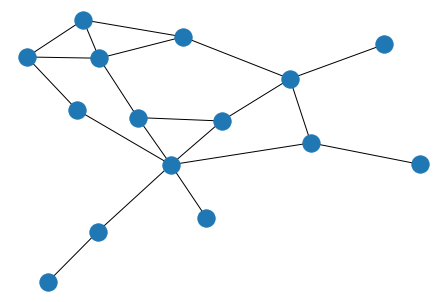

In [53]:
# The function nx.draw is main entry point for NetworkX plotting functions
nx.draw(G)

By default, the layout (that is the position of the nodes in the 2D plane) used is the spring layout. 

*Note that the spring layout uses random number  so running `nx.draw(G)` again will produce a different layout of nodes.*

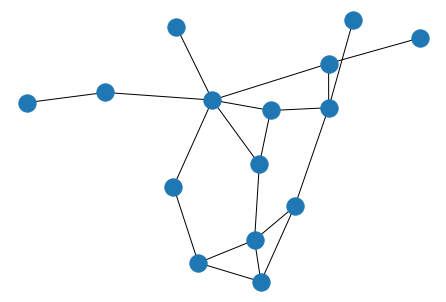

In [55]:
# run a second time - a different layout will result
nx.draw(G)

NetworkX, especially in the upcoming 2.0 version, has some more interesting layout algorithms. We can precompute the layout for a given graph and then pass it to the **nx.draw** function

In [58]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([ 0.50850397, -0.27619794]),
 'Medici': array([ 0.25304817, -0.06950922]),
 'Castellani': array([-0.40516391,  0.33155235]),
 'Peruzzi': array([-0.66772475,  0.23323834]),
 'Strozzi': array([-0.44768238,  0.11016672]),
 'Barbadori': array([-0.02499078,  0.23210422]),
 'Ridolfi': array([-0.10263107, -0.07278176]),
 'Tornabuoni': array([ 0.06210419, -0.01796602]),
 'Albizzi': array([ 0.01224139, -0.32485505]),
 'Salviati': array([0.68238384, 0.00773986]),
 'Pazzi': array([1.        , 0.05100534]),
 'Bischeri': array([-0.57464612,  0.0174301 ]),
 'Guadagni': array([-0.20120635,  0.02998683]),
 'Ginori': array([ 0.01114999, -0.67047384]),
 'Lamberteschi': array([-0.10538619,  0.41856008])}

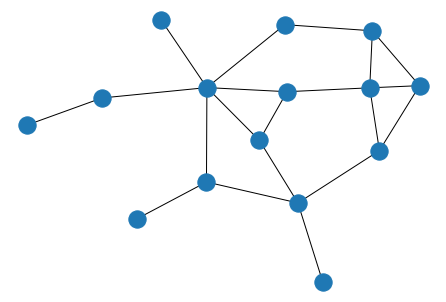

In [57]:
nx.draw(G, pos=pos_fr)

We can also control the size and color of the nodes, the with of the edges, the labels of the nodes and their fonts via *kwargs* of **nx.draw**:

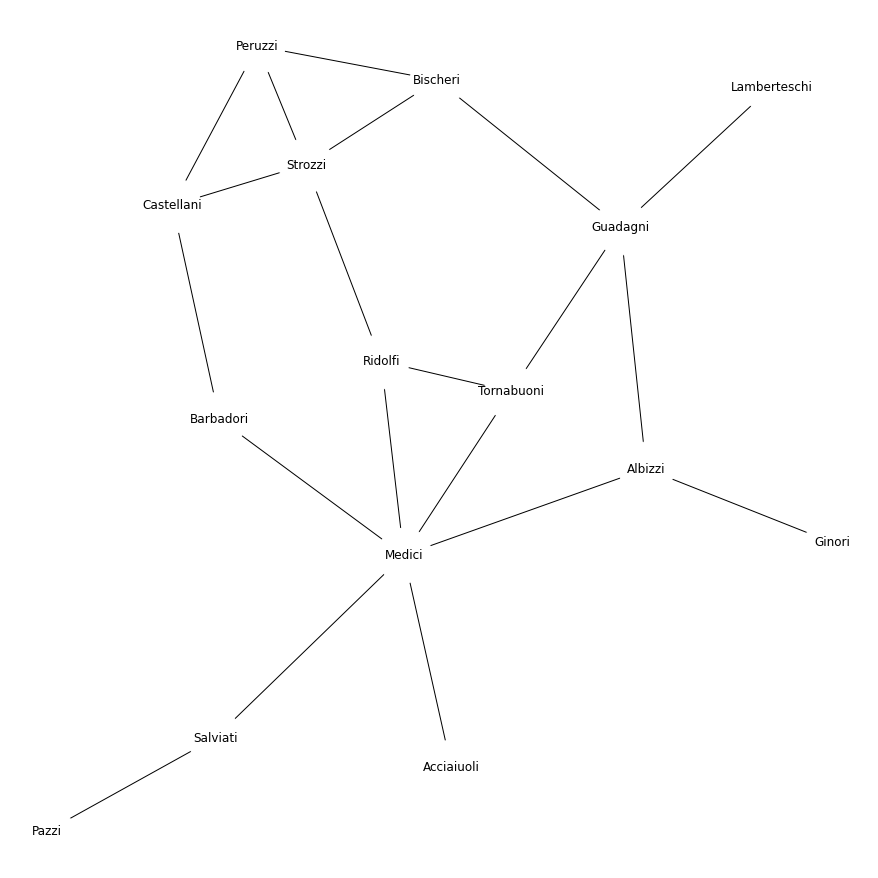

In [51]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

If we want to plot more complex plots, for instance, plot nodes of different colors and sizes, add labels to only some nodes, add edge labels, etc ... We have to use more specialized plot functions such as:

* **nx.draw_networkx_nodes**
* **nx.draw_networkx_edges**
* **nx.draw_networkx_lables**
* **nx.draw_networkx_edge_lables**

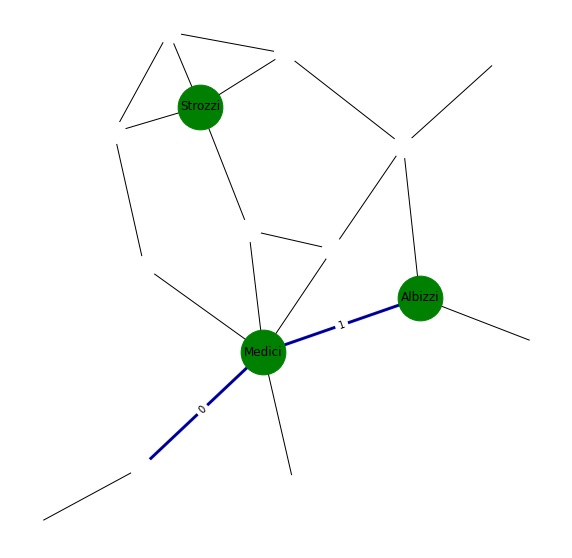

In [52]:
plt.figure(figsize=(10,10))
big_and_green_nodes = {'Medici', 'Albizzi', 'Strozzi'}
other_nodes = set(G) - big_and_green_nodes
thick_edges = {('Medici', 'Albizzi'), ('Medici', 'Salviati')}
other_edges = set(G.edges()) - thick_edges
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=big_and_green_nodes, node_size=2000, node_color='green')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=other_nodes, node_size=500, node_color='white')
# Plot edges 
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=thick_edges, width=3, edge_color='blue')
nx.draw_networkx_edges(G, pos=pos_fr, edge_list=other_edges)
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in big_and_green_nodes})
# Plot edge labels
nx.draw_networkx_edge_labels(G, pos=pos_fr, edge_labels={e: i for i, e in enumerate(thick_edges)})
# Remove axes
ax = plt.gca()
ax.set_axis_off()

### Common formats for reading and writing Graphs

You can see the complete list of supported formats at [Read and Write documentation](http://networkx.readthedocs.io/en/stable/reference/readwrite.html)

Some examples of the most common formats:

* **Adjacency list** Simple format, no attributes
    - **nx.read_adjlist**
    - **nx.write_adjlist**
* **Edge list** Simple format, no attributes
    - **nx.read_edgelist**
    - **nx.write_adjlist**
* **GEXF** Designed to be a standard exchange format for graphs (Gephi)
    - **nx.read_gexf**
    - **nx.write_gexf**
* **GML** Hierarchical ASCII-based file format for describing graphs
    - **nx.read_gml**
    - **nx.write_gml**
* **Pickle** Python standard persistency module (serialize objects to HD)
    - **nx.read_gpickle**
    - **nx.write_gpickle**
* **GraphML** An XML-based file format for graphs
    - **nx.read_graphml**
    - **nx.write_graphml**
* **Pajek** Popular network format used in Pajek (no complete written specification)
    - **nx.read_pajek**
    - **nx.write_pajek**

## Network Analysis

Now we'll focus on some key analysis techniques that will allow us to understand the structure of social networks and the importance of its components

### Basic concepts: Degree

The degree of a node it's the number of incident edges to that node.

* **undirected graphs** it'is equal to their number of neighbors.

* **directed graphs** we have to distinguish between incoming edges and outgoing edges, and thus we have to distinguish between successors and predecessors.
    - **In-degree** Number of predecessors
    - **Out-degree** Nuber of successors

#### Undirected Graphs

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

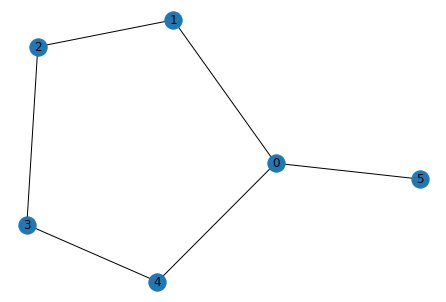

In [56]:
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

In [57]:
# You can also get the degree for a single node
G.degree(5)

1

#### Quick exercise
How to select the node with the greatest degree?

In [58]:
# hint max could help?
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [60]:
max(G, key=G.degree)

0

In [ ]:
# We can get the neighbors of node 0
list(G.neighbors(0))

In [61]:
# We can also access the neighbors, along with the edge labels (empty in this example)
# using the subscript notation
G[0]

AtlasView({1: {}, 4: {}, 5: {}})

#### Directed Graphs

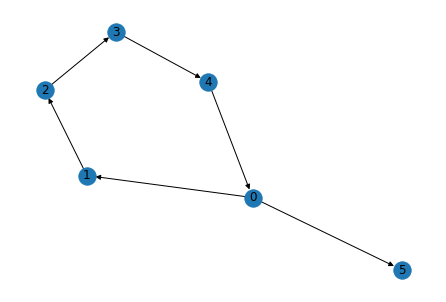

In [62]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D, pos=nx.fruchterman_reingold_layout(D), with_labels=True)

In [63]:
dict(D.in_degree())

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

In [64]:
dict(D.out_degree())

{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0}

In [65]:
# We can get the successors of a node
list(D.successors(0))

[1, 5]

In [66]:
# And it's predecessors
list(D.predecessors(0))

[4]

In [67]:
# For digraphs the subscript notation yields the successors for a node
D[0]

AtlasView({1: {}, 5: {}})

#### Weighted Graphs and weighted degree

Edges can have attributes, a very common and useful edge attribute is **weight** which is used to model intensity of relations.

The weighted degree of a node is the sum of the weights of its incident edges. 

{(0, 1): Text(0.5805569110110903, 0.7285467787867412, '1'),
 (0, 4): Text(0.19204350783681712, 0.2780922992268521, '2'),
 (1, 2): Text(0.1687715812491561, 0.18943856005284035, '3'),
 (2, 3): Text(-0.272600418847907, -0.7131492374266286, '4'),
 (3, 4): Text(-0.6687715812491557, -0.4829284006398052, '5')}

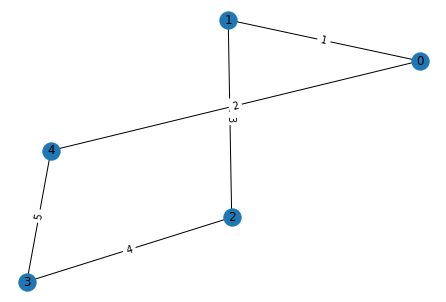

In [62]:
W = nx.cycle_graph(5)
for i, (u, v) in enumerate(W.edges(), 1):
    W[u][v]['weight'] = i
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [63]:
dict(W.degree())

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2}

In [64]:
dict(W.degree(weight='weight'))

{0: 3, 1: 4, 2: 7, 3: 9, 4: 7}

#### Quick exercise *Advanced*
How can we get the node with greatest weighted degree using the build-in **max** function?

Two possible approaches: use **partial** from the **functools** module or compute first the weighted degree for all nodes. 

In [74]:
# ANSWER
# this advanced stuff
# for good description of partial see https://stackoverflow.com/a/15331967
from functools import partial
p_weight = partial(W.degree, weight='weight')
node_greatest_weight = max(W, key=p_weight)
print('node with greatest weighted degree ', node_greatest_weight)

node with greatest weighted degree  3


In [73]:
# ANSWER
nodes_weighted_degree = dict(W.degree(weight='weight'))
node_greatest_weight = max(W, key=nodes_weighted_degree.get)
print('node with greatest weighted degree ', node_greatest_weight)

node with greatest weighted degree  3


## *Workshop continues*

*This is the end of this brief introduction exercise. Please see the original workshop at https://github.com/jtorrents/pydata_bcn_NetworkX for more advanced topics:*

3. Network Analysis...
    * ~~Distance measures: paths, simple paths, and shortest paths.~~
    * ~~Node centrality analysis: measures and their relation.~~
    * ~~Analyzing groups and subgroups: Cliques, k-cores, components, and k-components.~~
4. ~~Bipartite Graphs~~
    * ~~Definition of bipartite networks and their use in modeling group affiliations.~~
    * ~~Working with bipartite networks with NetworkX~~.